https://datahub.io/sports-data/atp-world-tour-tennis-data#r

https://github.com/serve-and-volley/atp-world-tour-tennis-data/tree/master/csv

In [1]:
# install.packages("ggplot2")
install.packages('ggraph')
library(tidyverse);
library(ggraph)
library(tidygraph)

also installing the dependencies ‘ggforce’, ‘igraph’, ‘ggrepel’, ‘tidygraph’, ‘graphlayouts’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘tidygraph’


The following object is masked from ‘package:stats’:

    filter




In [2]:
first_set <- read_csv("/home/jovyan/Final/data/scores_1968_1990.csv");
second_set <- read_csv("/home/jovyan/Final/data/scores_1991_2016.csv");
last_set <- read_csv("/home/jovyan/Final/data/scores_2017.csv");


Rows: 73010 Columns: 24

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_year_id, tourney_slug, tourney_url_suffix, tourney_round_n...
dbl  (9): tourney_order, round_order, match_order, winner_sets_won, loser_se...
lgl  (1): match_stats_url_suffix


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 95359 Columns: 24

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): tourney_year_id, tourney_slug, tourney_url_suffix, tourney_round_n...
dbl  (9): tourney_order, round_order, match_order, winner_sets_won, loser_se...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 3830 Columns: 24

── Column specification ───────────────────────────────────────────

In [3]:
# colnames(second_set)
# head(second_set)

In [4]:
usopen = last_set %>% filter(tourney_slug == "us-open")
top8 = usopen %>% filter(round_order <= 3)

In [5]:
create_net <- function(df){

    create_nodes <- function(df){
        # Hardcoding name columns. Can be put in arguments to generalize
        players = unique(c(df$winner_name, df$loser_name))
        return(players)
    }
    
    # Node for each player
    nodes = create_nodes(df)
    
    
    matchups = df %>% select(c(loser_name, winner_name))
    edges = sapply(X = matchups, FUN = match, table = nodes)
    colnames(edges) = c("from", "to")
    
    return(list(nodes = as.data.frame(nodes), edges = edges))
}


In [6]:
network = create_net(top8)
network$edges = as.data.frame(network$edges)
network$edges
network$nodes

from,to
<int>,<int>
2,1
3,1
4,2
5,1
6,3
7,4
8,2


nodes
<chr>
Rafael Nadal
Kevin Anderson
Juan Martin del Potro
Pablo Carreno Busta
Andrey Rublev
Roger Federer
Diego Schwartzman
Sam Querrey


In [7]:
net_graph <- tbl_graph(nodes = network$nodes, 
                             edges = network$edges, 
                             directed = TRUE)

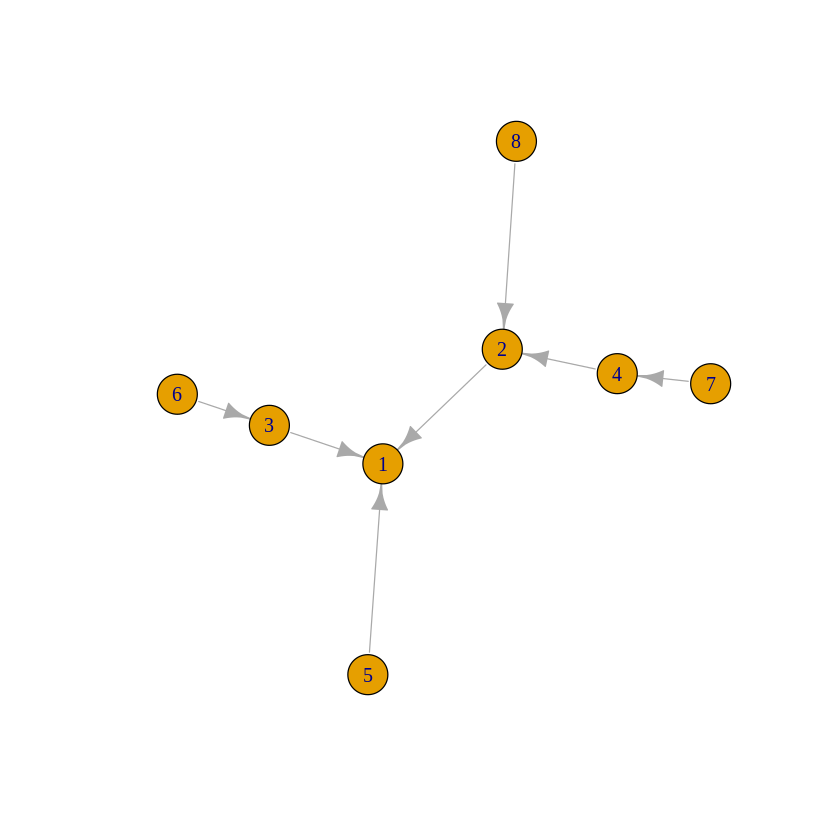

In [8]:
plot(net_graph)

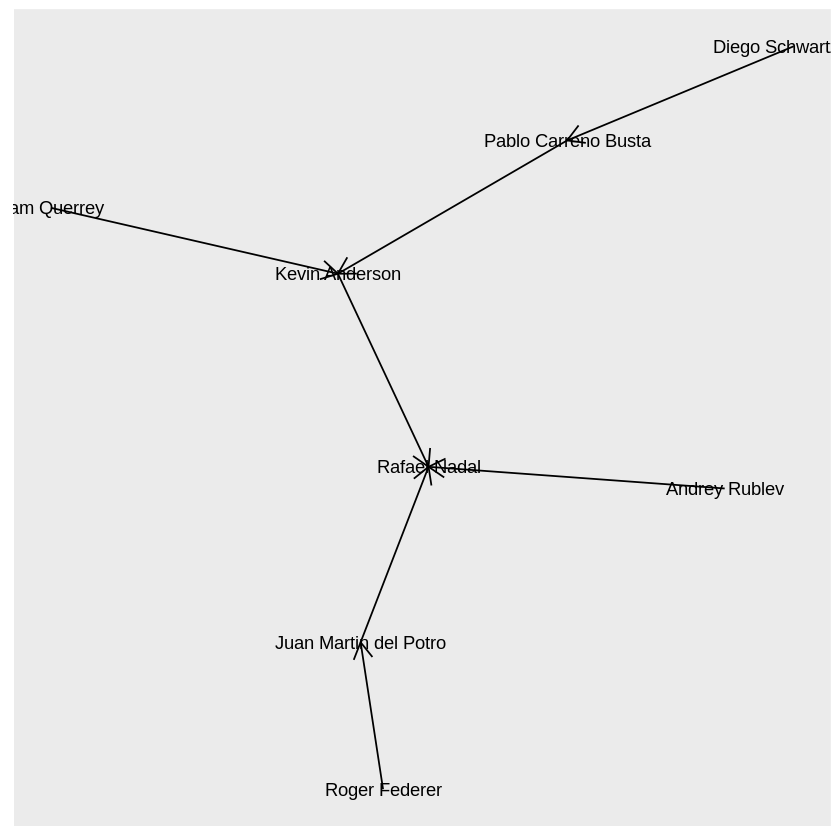

In [9]:
ggraph(net_graph, layout = 'graphopt') + 
    geom_edge_link(arrow = arrow(length = unit(4, 'mm'))) + 
    geom_node_text(aes(label = nodes))

In [10]:
exs = last_set[sample(nrow(last_set), 1000), ]

In [11]:
network2 = create_net(exs)
network2$edges = as.data.frame(network2$edges)
network2$edges
network2$nodes

from,to
<int>,<int>
96,1
203,2
251,3
171,4
109,5
85,6
88,7
225,8
175,9


nodes
<chr>
Darian King
David Goffin
Radu Albot
Filip Krajinovic
Marco Cecchinato
Pablo Cuevas
Damir Dzumhur
Lucas Pouille
Miljan Zekic


In [12]:
fed_nadal <- last_set %>% filter((winner_name == "Roger Federer" & loser_name == "Rafael Nadal")|
                                    (winner_name == "Rafael Nadal" & loser_name == "Roger Federer"))

In [13]:
fn_net = create_net(fed_nadal)
fn_net$edges = as.data.frame(fn_net$edges)
fn_net$edges
fn_net$nodes

from,to
<int>,<int>
2,1
2,1
2,1
2,1


nodes
<chr>
Roger Federer
Rafael Nadal


In [14]:
net_graph_fn <- tbl_graph(nodes = fn_net$nodes, 
                             edges = fn_net$edges, 
                             directed = TRUE)


In [15]:
library(igraph)


Attaching package: ‘igraph’


The following object is masked from ‘package:tidygraph’:

    groups


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [16]:
network <- graph_from_data_frame(d=fn_net$edges, directed=F)

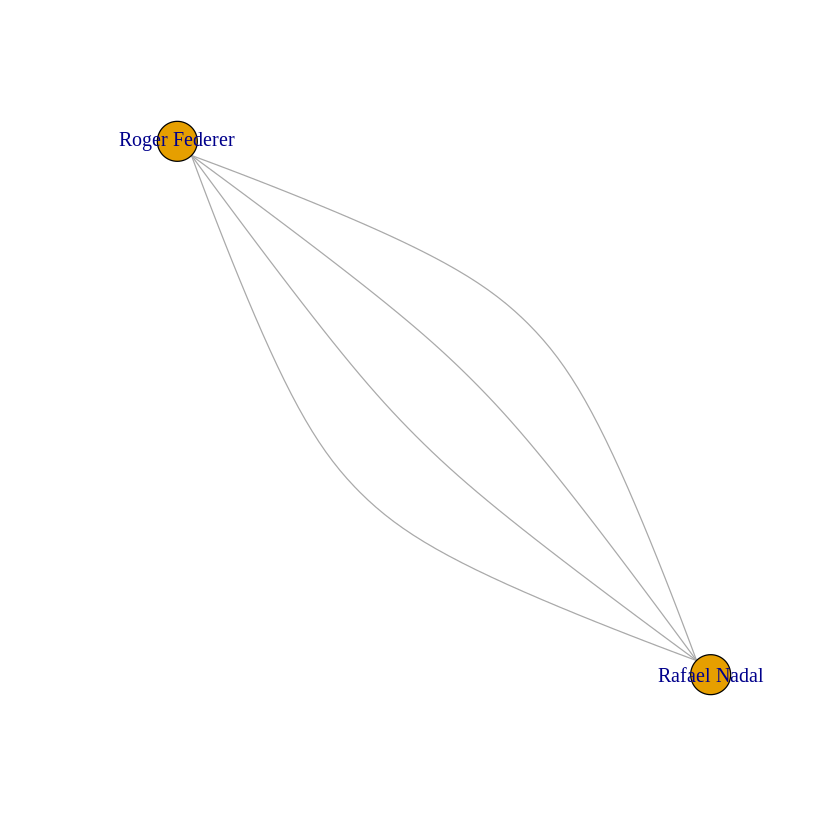

In [17]:
plot(network, vertex.label = fn_net$nodes[[1]], mode = "directed")

In [18]:
#plot(network, vertices = fn_net$nodes[[1]], directed = T)

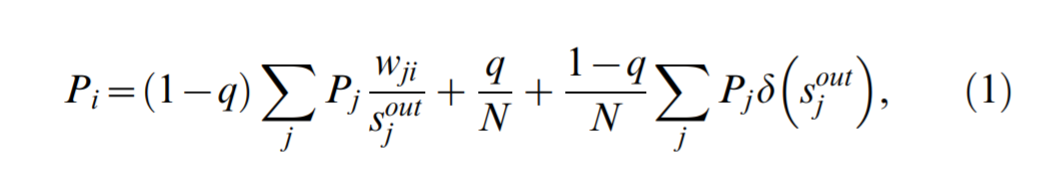

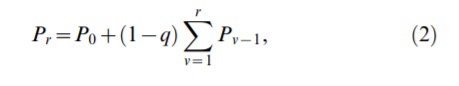

In [19]:
q = .15
#P_0 = 1/length()